In [1]:
'''
- around 89% of videos are correctly predicted.
- Deviation from actual start-time of answers from predicted start-time:
    (Effective-Error) (Has to be same as v1 as same segmented transcripts are used for QA)
    - Roberta model:
        - Average of 78s or 8.5% of video, 
        - Average of 15.4s or 1.8% of video, ignoring 20% of outliers
    - DistilBert model:
        - Average of 82.86s or 9.21% of video, 
        - Average of 19.62s or 2.26% of video, ignoring 20% of outliers
'''
''''''

''

In [2]:
import pandas as pd
from utils import *

In [3]:
qdset = pd.read_csv('../yt-dset-questions-v1.csv')
dsetDetails = pd.read_csv('../yt-dset-vid-details.csv')
quesdset = qdset.join(dsetDetails.set_index('Video_ID'), on='Video_ID')

In [4]:
tdset = pd.read_csv('../v2-results/yt-dset-results-videoIds-trnidx.csv')
edset = pd.read_csv('../v2-results/yt-dset-results-videoIds-extidx.csv')
bdset = pd.read_csv('../v2-results/yt-dset-results-videoIds-bothidx.csv')
rob_ansdset = pd.read_csv('../v2-results/yt-dset-results-ans-rob.csv')
dis_ansdset = pd.read_csv('../v2-results/yt-dset-results-ans-dis.csv')

Video Id retrieval results:

In [5]:
correctVideoIds = list(quesdset['Video_ID'])
#Below will be compared

Overall result:


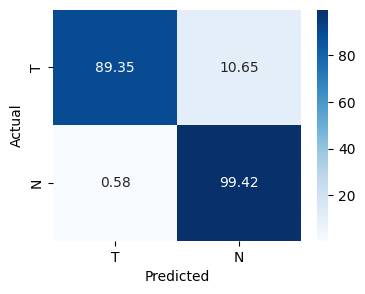

Confused pairs:  [[(107, 204), 19.51], [(401, 405), 16.67], [(104, 207), 7.41], [(207, 405), 6.9], [(401, 402), 4.55]]
Related Videos result:  [58.33, 41.67]


In [6]:
#Transcript Index
predictedVideoIds = list(tdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(tdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


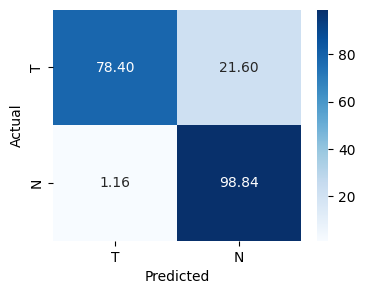

Confused pairs:  [[(107, 204), 24.39], [(406, 407), 20.83], [(401, 405), 16.67], [(106, 407), 10.0], [(401, 402), 9.09]]
Related Videos result:  [52.05, 47.95]


In [7]:
#Extracted-Text Index
predictedVideoIds = list(edset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(edset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


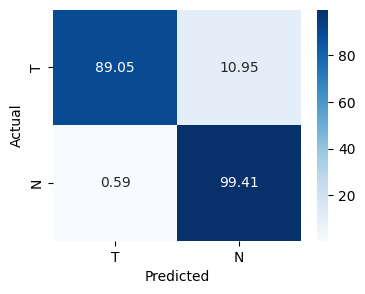

Confused pairs:  [[(107, 204), 24.39], [(401, 405), 12.5], [(401, 402), 9.09], [(401, 407), 8.33], [(104, 207), 7.41]]
Related Videos result:  [67.57, 32.43]


In [8]:
#Combined Index
predictedVideoIds = list(bdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(bdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Answer prediction results (Roberta):

In [9]:
dset = rob_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Answer,Start_timestamp,End_timestamp,Duration,Link
0,101,kubernetes is we're going to start off with th...,1,38,kubernetes is we're going to start off with th...,1,38,NaN,101,What is Kubernetes?,kubernetes is an open source container orchest...,64,98,852,https://youtu.be/VnvRFRk_51k
1,101,Cabezas,10,13,Cabezas basically why did kubernetes even come...,10,34,NaN,101,Who developed Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
2,101,Cabezas,10,13,Cabezas basically why did kubernetes even come...,10,34,NaN,101,Who created Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
3,101,keeps an overview of what's happening in the c...,322,326,keeps an overview of what's happening in the c...,322,329,NaN,101,What is the job of controller manager in Kuber...,controller manager which basically keeps an ov...,321,332,852,https://youtu.be/VnvRFRk_51k
4,101,scheduling containers,337,340,basically responsible for scheduling containers,334,340,203,101,What is the job of scheduler in Kubernetes?,scheduler which is basically responsible for s...,336,360,852,https://youtu.be/VnvRFRk_51k


100% Mean: 8.41
80% Mean: 1.7


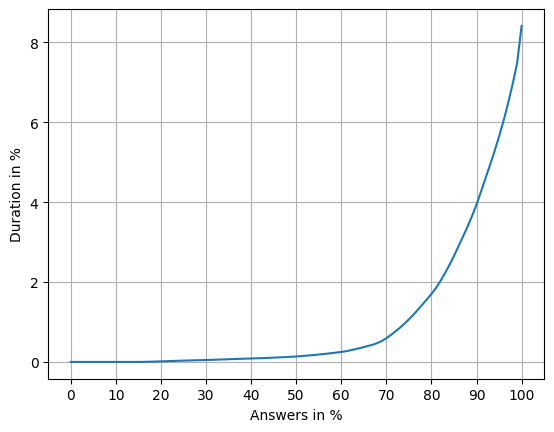

100% Mean: 77.36
80% Mean: 14.75


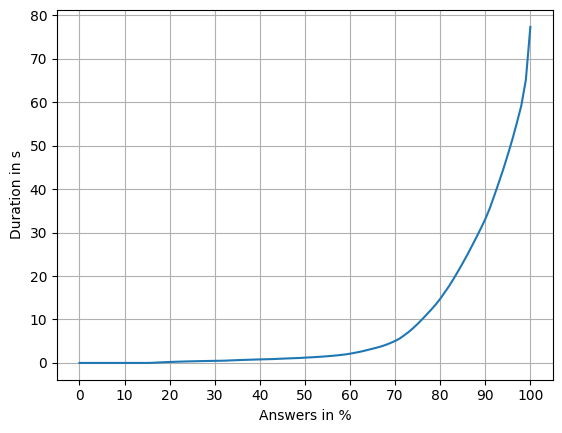

In [10]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 8.61
80% Mean: 1.84


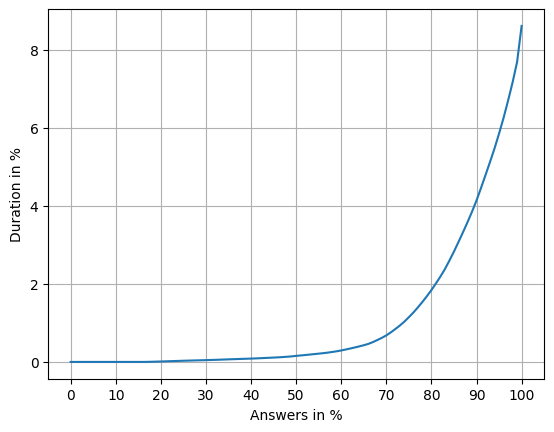

100% Mean: 78.62
80% Mean: 15.97


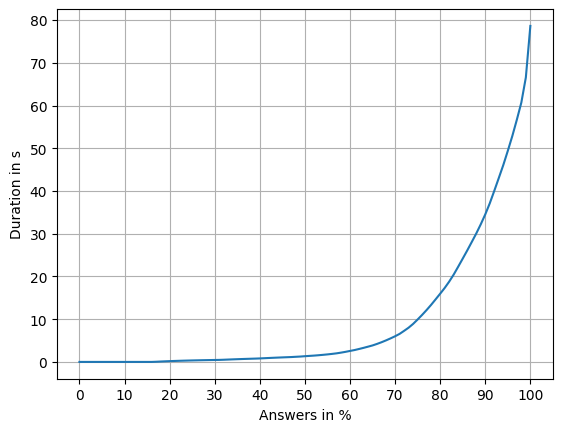

In [11]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 8.51
80% Mean: 1.8


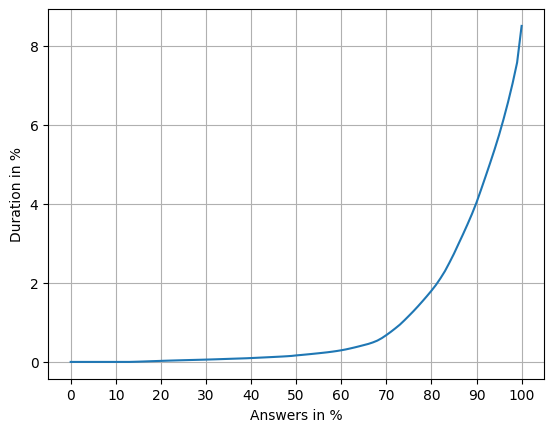

100% Mean: 77.99
80% Mean: 15.39


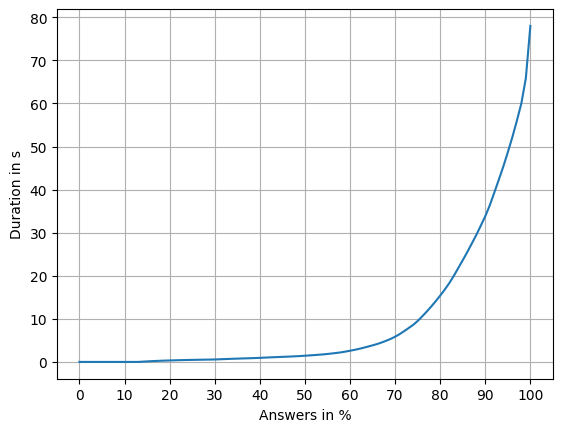

In [12]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')

Answer prediction results (Distilbert):

In [13]:
dset = dis_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Answer,Start_timestamp,End_timestamp,Duration,Link
0,101,problem solution case study of Cabezas,8,13,the problem solution case study of Cabezas,8,13,NaN,101,What is Kubernetes?,kubernetes is an open source container orchest...,64,98,852,https://youtu.be/VnvRFRk_51k
1,101,Cabezas,10,13,problem solution case study of Cabezas,8,13,NaN,101,Who developed Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
2,101,Cabezas,10,13,problem solution case study of Cabezas,8,13,NaN,101,Who created Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
3,101,keeps an overview of what's happening in the c...,322,326,keeps an overview of what's happening in the c...,322,334,NaN,101,What is the job of controller manager in Kuber...,controller manager which basically keeps an ov...,321,332,852,https://youtu.be/VnvRFRk_51k
4,101,scheduling containers,337,340,responsible for scheduling containers on diffe...,334,340,203,101,What is the job of scheduler in Kubernetes?,scheduler which is basically responsible for s...,336,360,852,https://youtu.be/VnvRFRk_51k


100% Mean: 9.25
80% Mean: 2.24


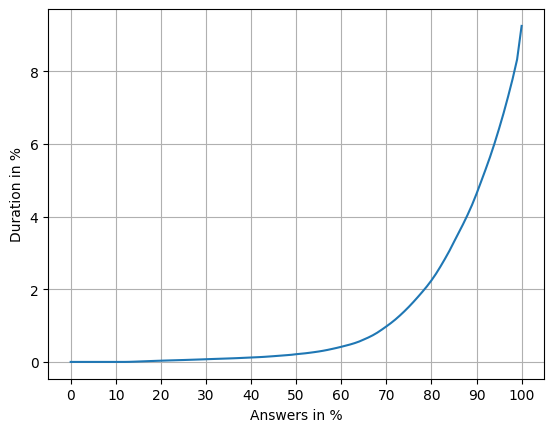

100% Mean: 82.11
80% Mean: 19.42


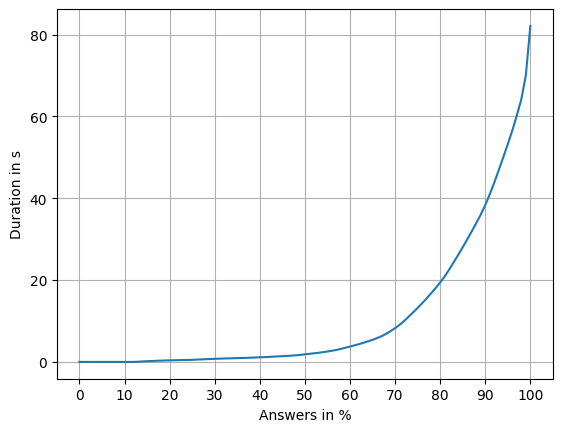

In [14]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 9.17
80% Mean: 2.2


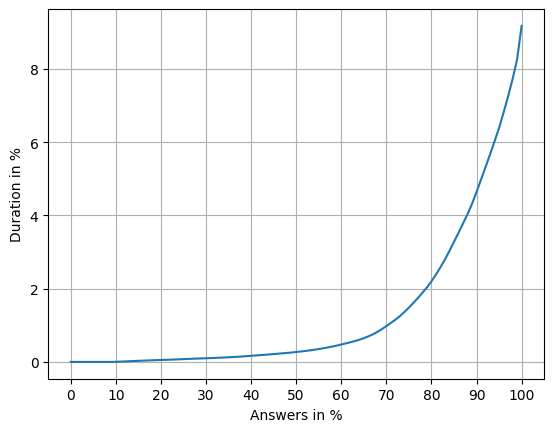

100% Mean: 81.61
80% Mean: 19.42


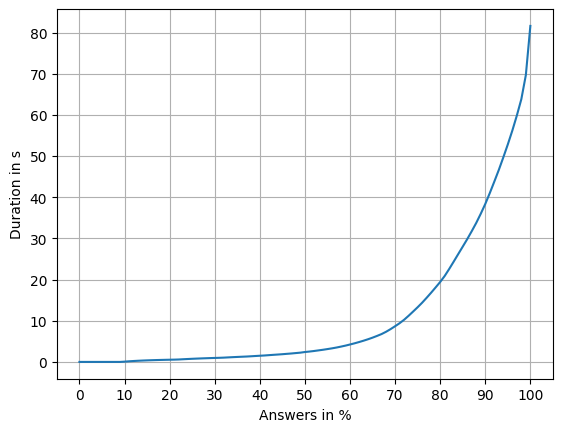

In [15]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 9.21
80% Mean: 2.26


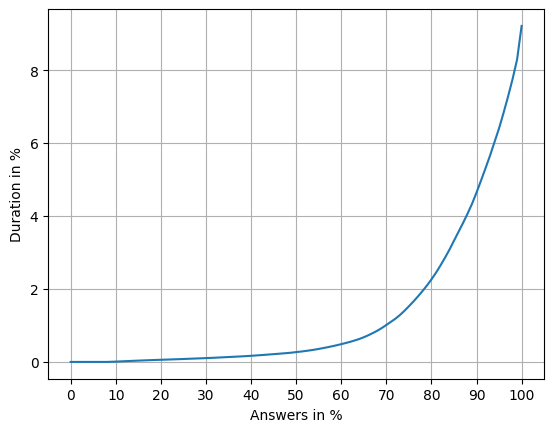

100% Mean: 81.86
80% Mean: 19.62


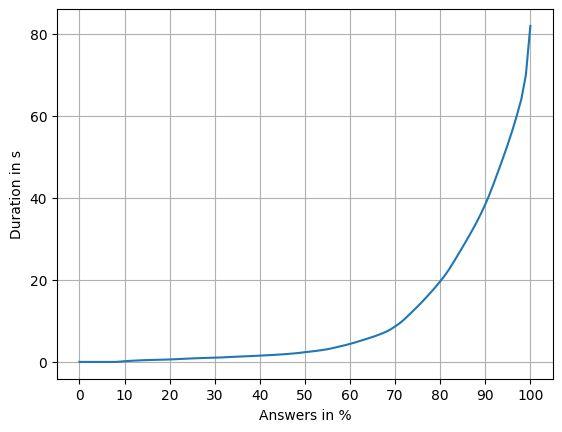

In [16]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')